In [2]:
# 데이터 구성 : Series, DataFrame
import pandas as pd
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# 데이터 scaling
from sklearn.preprocessing import StandardScaler
# 데이터 분할 : train, test
from sklearn.model_selection import train_test_split
# 분류 KNN
from sklearn.neighbors import KNeighborsClassifier
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV
# 모델 성능 평가
from sklearn.metrics import confusion_matrix

In [ ]:
df = pd.read_csv()

In [ ]:
df.isnull().sum(axis = 0)

In [3]:
# KNN 모델 생성(default 설정)
knn_uncusotomized = KNeighborsClassifier()
knn_uncusotomized.fit(df_train_x, df_train_y)
# train 데이터 셋 정확도
print('Accuracy on training set: {:.3f}'.format(knn_uncusotomized.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print('Accuracy on test set: {:.3f}'.format(knn_uncusotomized.score(df_test_x, df_test_y)))

NameError: name 'df_train_x' is not defined

In [4]:
knn_uncusotomized

KNeighborsClassifier()

In [5]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# 최대 이웃 수 : 1 ~ 15
para_n_neighbors = [i for i in range(1,16)]

for v_n_neighbors in para_n_neighbors :
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors['Neighbors'] = para_n_neighbors
df_accuracy_neighbors['TrainAccuracy'] = train_accuracy
df_accuracy_neighbors['TestAccuracy'] = test_accuracy
df_accuracy_neighbors.round(3)

NameError: name 'df_train_x' is not defined

ValueError: x and y must have same first dimension, but have shapes (15,) and (0,)

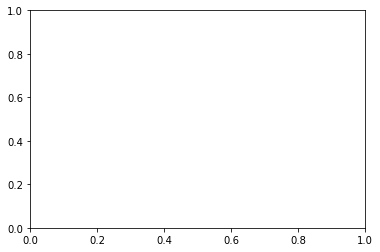

In [6]:
plt.plot(para_n_neighbors, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_n_neighbors, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.ylabel("accuracy"); plt.xlabel("n_neighbors")
plt.legend()


In [7]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# 이웃 수 
para_n_neighbors = [i for i in range(1,11)] * 2

# 가중치(uniform, distance)
para_weights = (["uniform"]) * 10 + (["distance"]*10)

# zip( list1, list2, ···)를 사용하면 list1과 list2의 인덱스별 값을 하나씩 가져옴
# 1번 loop: n_neighbors = para_n_neighbors[0], weights = para_weights[0]
# 2번 loop: n_neighbors = para_n_neighbors[1], weights = para_weights[1]

for (v_n_neighbors, v_weights) in zip(para_n_neighbors, para_weights) :
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors, weights = v_weights)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_weights = pd.DataFrame()
df_accuracy_weights['Neighbors'] = para_n_neighbors
df_accuracy_weights['Weights'] = para_weights
df_accuracy_weights['TrainAccuracy'] = train_accuracy
df_accuracy_weights['TestAccuracy'] = test_accuracy
df_accuracy_weights.round(3)

NameError: name 'df_train_x' is not defined

In [ ]:
# 그림을 그리기 위해 데이터의 형태를 반환
df_accuracy_weights_pivot = df_accuracy_weights.pivot(index = "Neighbors", columns = "Weights", \
                                                     values = ["TrainAccuracy", "TestAccuracy"])
df_accuracy_weights_pivot

In [ ]:
# pivot을 이용할 경우, columns와 values가 2개의 level로 이루어지므로 하나의 level로 변환
level0 = df_accuracy_weights_pivot.columns.get_level_values(0)
level1 = df_accuracy_weights_pivot.columns.get_level_values(1)
df_accuracy_weights_pivot.columns = level0 + "_" + levle1
df_accuracy_weights_pivot.head()

In [ ]:
# 그래프 생성. 변수별 linestyle 구분
sns.lineplot(data = df_accuracy_weights_pivot)

# 임의로 지정
weights = 'uniform'

In [ ]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# 이웃 수 
para_n_neighbors = [i for i in range(1,11)] * 3
# 거리 계산 방법 (minkowski, euclidean, manhattan)
para_metrice = ["minkowski"] * 10 + ["euclidean"] * 10 + ["manhattan"] * 10

for (v_n_neighbors, v_metric) in zip(para_n_neighbors, para_metric) :
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors, metric = v_metric, weights = 'uniform')
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_metric = pd.DataFrame()
df_accuracy_metric['Neighbors'] = para_n_neighbors
df_accuracy_metric['Metric'] = para_metric
df_accuracy_metric['TrainAccuracy'] = train_accuracy
df_accuracy_metric['TestAccuracy'] = test_accuracy
df_accuracy_metric.round(3)

In [8]:
# 정확도를 그래프로 그림
df_accuracy_metric_pivot = df_accuracy_metric.pivot(index = 'Neighbors', columns = 'Metric', \
                                                   values = ["TrainAccuracy", "TestAccuracy"])
level0 = df_accuracy_metric_pivot.columns.get_level_values(0)
level1 = df_accuracy_metric_pivot.columns.get_level_values(1)
df_accuracy_metric_pivot.columns = level0 + "_" + level1
sns.lineplot(data = df_accuracy_metric_pivot)

NameError: name 'df_accuracy_metric' is not defined

In [ ]:
# 최종 모델
knn_model = KNeighborsClassifier(n_neighbors = 4, weights = 'uniform', metric = 'euclidean')
knn_model.fit(df_train_x, df_train_y)

# 평가
y_pred = knn_model.predict(df_test_x)
# train 데이터 셋 정확도
print('train data accuracy: {0:.3f}'.format(knn_model.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print('test data accuracy: {0:.3f}\n'.format(knn_model.score(df_test_x, df_test_y)))
# confusion matrix
print('Confusion matrix: \n{}'.format(confusion_matrix(df_test_y, y_pred)))